In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [2]:
# z_n+1 = z^2 + c
def mandelbrot(z, c):
    return add_complex(square_complex(z), c)

# (a + bi)^2 = a^2 - b^2 + 2abi
def square_complex(z):
    return complex(z.real**2 - z.imag**2, 2*z.real*z.imag) 

# a+bi + c+di = a+b + (b+d)i
def add_complex(z1, z2):
    return complex(z1.real + z2.real, z1.imag + z2.imag)

# |z| = sqrt(a^2 + b^2)
def magnitude_complex(z):
    return np.sqrt(z.real**2 + z.imag**2)

In [20]:
def monte_carlo(n_iterations, n_samples, max_iterations, re_min, re_max, im_min, im_max):
    areas = []
    area_integration_box = np.abs(re_max-re_min) * np.abs(im_max-im_min)

    for i in range(n_iterations):
        z = complex(0, 0)
        points_outside = 0

        for j in range(n_samples):
            c_re = np.random.choice(np.arange(re_min, re_max))
            c_im = np.random.choice(np.arange(im_min, im_max))
            c_random = complex(c_re, c_im)
            z = complex(0, 0)
            for k in range(max_iterations):
                z = mandelbrot(z, c_random)
                if magnitude_complex(z) > 2:
                    points_outside += 1
                    break

        area = area_integration_box * (1 - points_outside / n_samples)

        areas.append(area)
    
    return areas

In [30]:
def analyse_monte_carlo(n_iter_start, n_iter_stop, iteration_step, n_samp_start, n_samp_stop, sample_step, re_min, re_max, im_min, im_max):
    all_means = []
    all_stds = []
    iteration_range = range(n_iter_start, n_iter_stop, iteration_step)
    sample_range = range(n_samp_start, n_samp_stop, sample_step)

    for i in iteration_range:
        means = []
        stds = []

        for j in sample_range:
            areas = monte_carlo(i, j, 100, re_min, re_max, im_min, im_max)
            mean_area = np.mean(areas)
            std_area = np.std(areas)
            means.append(mean_area)
            stds.append(std_area)
        
        all_means.append(means)
        all_stds.append(stds)
    
    for k in range(len(all_means)):
        plt.errorbar(sample_range, all_means[k], yerr=all_stds[k], label=f'Iterations = {iteration_range[k]}')
    
    plt.xlabel('Number of samples')
    plt.ylabel('Area')
    plt.legend()
    plt.show()

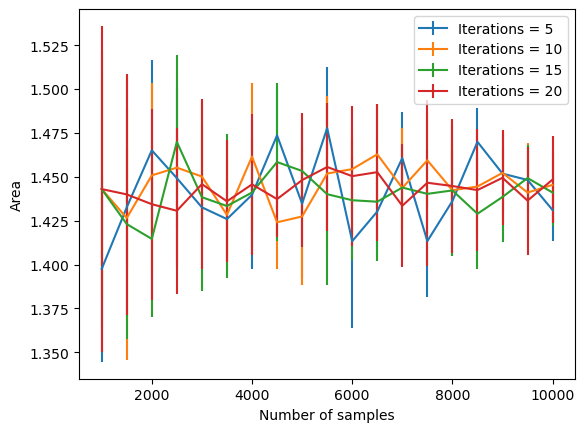

In [35]:
analyse_monte_carlo(5, 21, 5, 1000, 10001, 500, re_min=-2, re_max=0.6, im_min=-1.25, im_max=1.25)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100] [ 54110  75880 241090 125438  73942  42440  29696  19894  15308  11182
   9282   7054   6002   4918   4174   3496   3200   2630   2420   2106
   1854   1632   1550   1392   1324   1102   1006   1002    978    836
    908    656    692    664    570    532    500    500    440    464
    442    330    424    306    302    346    336    270    288    312
    212    262    202    234    228    202    190    212    192    196
    202    170    174    160    164    118    160    166    146    146
    102    120    118    114    138    156    106    116    110     90
     84     92     70

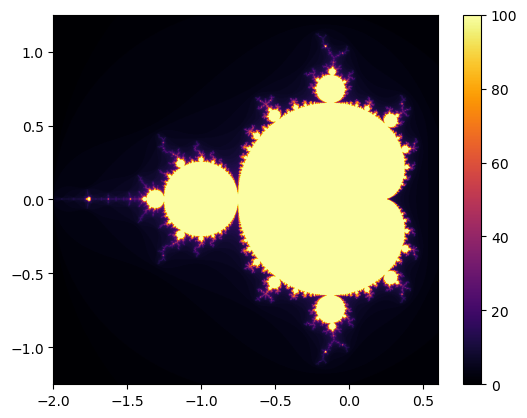

In [ ]:
def mandelbrot_plot(n_points, n_iterations, re_min, re_max, im_min, im_max, plot=False):
    real_range = np.linspace(re_min, re_max, n_points)
    imaginary_range = np.linspace(im_min, im_max, n_points)
    mat = np.full((n_points, n_points), n_iterations)

    for i, im in enumerate(imaginary_range):
        for j, re in enumerate(real_range):
            c = complex(re, im)
            z = complex(0, 0)
            for k in range(n_iterations):
                z = mandelbrot(z, c)
                if magnitude_complex(z) > 2:
                    mat[i, j] = k
                    # print(k)
                    break

    plt.imshow(mat, cmap='inferno', extent=[re_min, re_max, im_min, im_max])
    plt.colorbar()
    plt.show()

mandelbrot_plot(n_points=1000, n_iterations=100, re_min=-2, re_max=0.6, im_min=-1.25, im_max=1.25, plot=True)